In [61]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [62]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [63]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [64]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [65]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data)


In [66]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(
    market_data_scaled,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
market_data_scaled_df['coin_id'] = df_market_data.index

# Set the coinid column as index
market_data_scaled_df.set_index('coin_id', inplace=True)

# Display sample data
print(market_data_scaled_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [67]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [68]:
# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model with the loop counter for the number of clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)

    # Fit the model using the scaled data
    kmeans_model.fit(market_data_scaled_df)

    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)


c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [69]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


In [70]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values,
    width=800,
    height=400
)
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Probably 4. Though I wouldn't normally use the Elbow Method because Andrew Ng says he prefers other methods.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [71]:
# Initialize the K-Means model using the best value for k
km_model = KMeans(n_clusters=4, random_state=0)


In [72]:
# Fit the K-Means model using the scaled data
km_model.fit(market_data_scaled_df)


c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [73]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = km_model.predict(market_data_scaled_df)


# Print the resulting array of cluster values.
print("Cluster assignments for each cryptocurrency:")
print(crypto_clusters)

Cluster assignments for each cryptocurrency:
[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [74]:
# Create a copy of the DataFrame
df_market_data_predictions = market_data_scaled_df.copy()

In [75]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions['CryptoCluster'] = crypto_clusters

# Display sample data
df_market_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [76]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot
scatter_plot = df_market_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="CryptoCluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    width=800,
    height=600
)
scatter_plot
# 2D representation of multi-dimensional data, so some nuances of the clustering might
# not be visible in this view, so will use PCA to reduce the dimensions of the data.

:NdOverlay   [CryptoCluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [77]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [78]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(market_data_scaled_df)
pca_df = pd.DataFrame(
    data=pca_data, 
    columns=['PC1', 'PC2', 'PC3'],
    index=market_data_scaled_df.index
)
# View the first five rows of the DataFrame. 
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [79]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
print(pca.explained_variance_ratio_)
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2f}")

[0.3719856  0.34700813 0.17603793]
Total variance explained: 0.90


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** These three principal components together explain 90% of the total variance in the original dataset.

In [80]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    data=pca_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=market_data_scaled_df.index
)

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_scaled_df.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [81]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [82]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)

# 2. Fit the model to the data using `df_market_data_pca`
    model.fit(pca_df)

# 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [83]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_after_pca = pd.DataFrame(elbow_data)

In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_after_pca = df_elbow_after_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values,
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400
)
elbow_plot_after_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [85]:
# Initialize the K-Means model using the best value for k
km_model = KMeans(n_clusters=4, random_state=42)

In [86]:
# Fit the K-Means model using the PCA data
km_model.fit(pca_df)

c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\TJGil\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [87]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = km_model.predict(pca_df)

# Print the resulting array of cluster values.
print("Cluster assignments:")
print(crypto_clusters)

Cluster assignments:
[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [88]:
# Create a copy of the DataFrame with the PCA data
df_crypto_pca_predictions = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_crypto_pca_predictions['CryptoCluster'] = crypto_clusters

# Display sample data
print("\nSample data:")
print(df_crypto_pca_predictions.head())


Sample data:
                   PC1       PC2       PC3  CryptoCluster
coin_id                                                  
bitcoin      -0.600667  0.842760  0.461595              0
ethereum     -0.458261  0.458466  0.952877              0
tether       -0.433070 -0.168126 -0.641752              2
ripple       -0.471835 -0.222660 -0.479053              2
bitcoin-cash -1.157800  2.041209  1.859715              0


In [89]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_after_pca = df_crypto_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="CryptoCluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    xlabel="Principal Component 1",
    ylabel="Principal Component 2",
    width=800,
    height=600
)
scatter_plot_after_pca

:NdOverlay   [CryptoCluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [95]:
# Composite plot to contrast the Elbow curves
elbow_plot_original = df_elbow.hvplot.line(
    x="k", y="inertia", title="Elbow Curve (Original Data)",
    xticks=k_values, xlabel='Number of Clusters (k)', ylabel='Inertia',
    width=400, height=300, color='blue', label='Original Data'
)

elbow_plot_pca = df_elbow_after_pca.hvplot.line(
    x="k", y="inertia", title="Elbow Curve (PCA Data)",
    xticks=k_values, xlabel='Number of Clusters (k)', ylabel='Inertia',
    width=400, height=300, color='red', label='PCA Data'
)

composite_elbow = elbow_plot_original + elbow_plot_pca
composite_elbow

:Layout
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)

In [96]:
# Composite plot to contrast the clusters
scatter_plot_original = df_market_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h", y="price_change_percentage_7d",
    by="CryptoCluster", hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (Original Data)",
    xlabel="Price Change % (24h)", ylabel="Price Change % (7d)",
    width=400, height=400
)

scatter_plot_pca = df_crypto_pca_predictions.hvplot.scatter(
    x="PC1", y="PC2",
    by="CryptoCluster", hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (PCA Data)",
    xlabel="Principal Component 1", ylabel="Principal Component 2",
    width=400, height=400
)

composite_clusters = scatter_plot_original + scatter_plot_pca
composite_clusters

:Layout
   .NdOverlay.I  :NdOverlay   [CryptoCluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [CryptoCluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The original data plot uses specific features (24h and 7d price changes), while the PCA plot represents a combination of all features.
  PCA reduces noise and focuses on the most important patterns in the data leading to more distinct, clearer clusters. For example the green dot is clearly seperated from the blue dots now.

All further code below is not part of the homework and was done of my own volition.

In [97]:
# Get the feature names
feature_names = market_data_scaled_df.columns

# Create a DataFrame of the component loadings
component_df = pd.DataFrame(
    data=pca.components_.T,  # Transpose to get features as rows
    columns=['PC1', 'PC2', 'PC3'],
    index=feature_names
)

# Display the component loadings
print(component_df)

# Display the top contributing features for each component
for i, pc in enumerate(['PC1', 'PC2', 'PC3'], 1):
    print(f"\nTop 5 features contributing to {pc}:")
    print(component_df[pc].abs().sort_values(ascending=False).head())

                                   PC1       PC2       PC3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541

Top 5 features contributing to PC1:
price_change_percentage_200d    0.594468
price_change_percentage_1y      0.568379
price_change_percentage_24h     0.416728
price_change_percentage_60d     0.320365
price_change_percentage_30d     0.191523
Name: PC1, dtype: float64

Top 5 features contributing to PC2:
price_change_percentage_30d    0.562182
price_change_percentage_14d    0.540415
price_change_percentage_60d    0.434040
price_change_percentage_24h    0.358162
price_change_percentage_7d     0.227432
Name: PC2, dtype: float

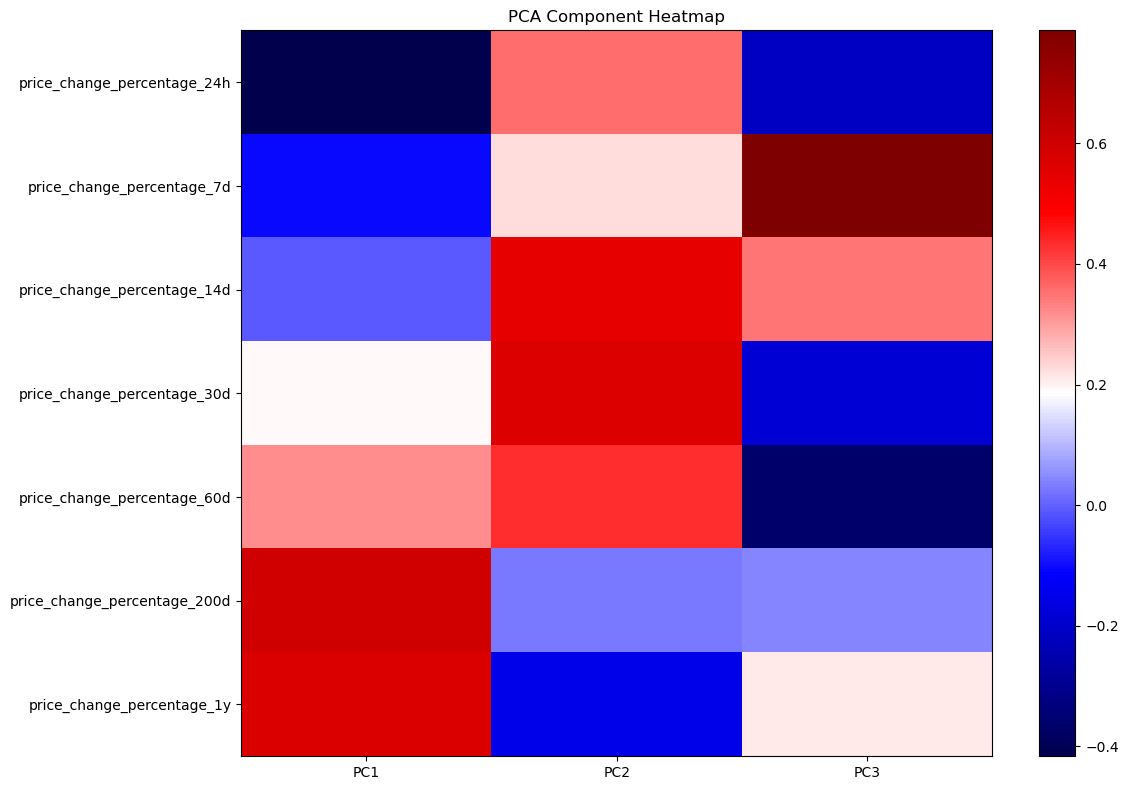

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(component_df, cmap='seismic', aspect='auto')
plt.colorbar()
plt.xticks(range(len(component_df.columns)), component_df.columns)
plt.yticks(range(len(component_df.index)), component_df.index)
plt.title("PCA Component Heatmap")
plt.tight_layout()
plt.show()

**Analysis:**

PC1 (explains the most variance):

Strongly positively correlated with long-term price changes (200d, 1y)
Negatively correlated with short-term changes (24h)
So PC1 might represent the contrast between long-term and short-term price trends.

PC2:

Positively correlated with medium-term price changes (30d, 14d, 60d)
Also has some positive correlation with short-term changes (24h, 7d)
PC2 might represent overall medium-term price trends.

PC3:

Strongly positively correlated with 7d price change
Mix of positive and negative correlations with other timeframes
PC3 might capture specific weekly price dynamics that differ from longer-term trends.




**Inference:**

Long-term vs. Short-term: There's a clear distinction between long-term and short-term price changes, primarily captured in PC1.
Medium-term Trends: PC2 seems to capture medium-term price trends.
Weekly Dynamics: PC3 gives special importance to weekly (7d) price changes.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

**Markdown cells below contain information from Claude AI when prompted with:
"So how would I use this information to predict future prices?"**

**Here's how you might use this information:**



**Pattern Recognition:**

The PCs identify key patterns in price changes across different timeframes.
You could monitor how new price data aligns with these patterns to get a sense of overall market trends.


**Cryptocurrency Grouping:**

The clusters group cryptocurrencies with similar behavior patterns.
You might expect cryptocurrencies in the same cluster to respond similarly to market conditions.


**Feature Selection for Predictive Models:**

The PCA results highlight which timeframes are most important in capturing price variability.
You could use this to select or weight features in a predictive model (e.g., giving more importance to 200d and 1y changes for long-term predictions).


**Market Segmentation:**

Different clusters might represent different market segments (e.g., stable coins, volatile coins, etc.).
You could develop separate prediction strategies for each segment.


**Trend Analysis:**

PC1 contrasts long-term and short-term trends. You could use this to identify cryptocurrencies where short-term trends are diverging from long-term trends, which might indicate potential price corrections.


**Anomaly Detection:**

Cryptocurrencies that don't fit well into any cluster or suddenly change clusters might be undergoing significant changes, which could precede price movements.


**Dimensionality Reduction for Other Models:**

You could use the PCA-transformed data as input for other machine learning models (e.g., regression, neural networks) that are more directly suited for price prediction.


**Correlation with External Factors:**

You could investigate how external factors (news, regulations, etc.) affect cryptocurrencies in different clusters, potentially helping predict reactions to future events.


**Risk Assessment:**

Clusters with high variability in PC3 (weekly changes) might be considered more risky or volatile in the short term.


**Portfolio Diversification:**

For investment purposes, you might choose cryptocurrencies from different clusters to diversify a portfolio.

**This analysis should be just one part of a comprehensive approach that might include:**

More advanced time series analysis techniques
Fundamental analysis of the cryptocurrencies and their underlying technologies
Sentiment analysis of news and social media
Consideration of broader economic factors and market conditions